In [1]:
import pandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

class PyView:
    
    # loading data from excel file
    def __init__ (self, excelFile) :
        self.cost = dict()
        self.weights = dict ()
        self.data = pandas.read_excel(excelFile)
        self.result_data = self.data.copy()

    # add attribut as parameter to set cost function for it
    # and add function of your own to calculate attributs in data
    def insertCost (self, attribut, fun):
        if attribut not in self.data.columns:
            print ("Attribut doesn't exist in data!")
            return
        self.cost[attribut] = fun
    
    # inserting weights to attribut
    def insertWeight (self, attribut, weight):
        if attribut not in self.data.columns:
            print ("Attribut doesn't exist in data!")
            return
        self.weights[attribut] = weight
        
    # converting attributes with cost functions    
    def convertCosts (self):
        keys = list( self.cost.keys() )

        if len(keys) == 0:
            print ("No cost function dictionary! Insert them with function obj.insertCost(Attribut, fun)")
            return
        
        # going through all inserted attributes
        for key in keys:
            
            # converting current value with inserted function witch is saved in costs
            for value in range(0, len(self.data[key])):
                self.data[key][value] = self.cost[key] (self.data[key][value])
    
    # muptiply each value in data with his weight
    def convertWeights (self):
        keys = list ( self.weights.keys())
        
        if len (keys) == 0:
            print ("No weight in dictionary! Insert them with function obj.insertWeight(Attribut, weight)")
            return
        
        for key in keys:
            
            for value in range (0, len( self.data[key])):
                self.result_data[key][value] = self.data[key][value] * self.weights[key] 
    
    # returns result of each row       
    def result (self):
        # all columns in our data
        keys = list( self.result_data.columns.values)
        # preparing array of zeros with length of first column
        res = [0] * len ( self.result_data[keys[0]])
        
        for key in keys:
            for index in range (0, len( self.data[key])):
                res[index] += self.result_data[key][index]
        
        return res
    
    # draw a graph of sensitivity on desired attribut
    def showDiagram (self, attribut):
        
        if attribut not in self.weights:
            print ("Attribut doesn't exist!")
            return
        
        size = len( self.data[attribut])
        # getting results of our data
        results = self.result()
        # current weight of desired attribut
        weight = self.weights[attribut]

        # preparing figure to display linear lines for each variation
        plt.figure ()
        
        plt.title ("Graph of sensitivity")
        plt.xlabel("Evalueted attribut: " + attribut)
        plt.ylabel("Cost")
        
        plt.plot ([weight, weight], [0, 100], '--b')
        
        for index in range(0, size):
            
            cost = self.data[attribut][index]
            
            plt.plot ([0, 1], [PyView.linear(weight, results[index], 1, cost, 0), cost], 'r')
            
        plt.show()
        
    # display data in table
    def displayData (self):
        print (self.data)
    
    # display cost of each added attribut in insertCost
    def displayCosts (self):
        keys = list(self.cost.keys())
        
        for key in keys:
            print (key + " " + str(self.cost[key](self.data[key][0])))
    
    # display weights of each added attribute in insertWeight
    def displayWeights (self):
        keys = list(self.weights.keys())
        
        for key in keys:
            print (key + ": " + self.weights[key])
    
    # displaing all values of attribut in our data
    def displayAttribut (self, attribut):
        print (self.data[attribut])
        
    # function used in creation of cost functions for each attribut
    def linear (x1, y1, x2, y2, x):
        m = (y2 - y1) / (x2 - x1)
        b = y1 - m * x1
        return m*x + b

In [2]:
test = PyView ("example_table.xlsx")
test.data

,Nadstropje,Cena,Udobje,Velikost sobe,Na vrhu stavbe
0,5,160,8,15,1
1,2,150,7,13,1
2,4,100,7,8,0
3,5,170,6,20,0
4,3,180,8,15,1


In [198]:
# example of creating cost functions
def cena (x):
    if x <= 100:
        return 100
    elif x > 100 & x <= 200:
        return PyView.linear(100, 100, 200, 0, x)
    else:
        return 0
    
def vrh (x):
    if x == 1:
        return 100
    else:
        return 0

def soba (x):
    return PyView.linear(8, 0, 20, 100, x)

def udobje (x):
    return PyView.linear(0, 0, 10, 100, x)

def nadstropje (x):
    if x < 2:
        return 0
    elif x > 5:
        return 0
    else:
        return PyView.linear(5, 10, 2, 100, x)

In [199]:
# insert cost functions
test.insertCost("Nadstropje", nadstropje)
test.insertCost("Cena", cena)
test.insertCost("Udobje", udobje)
test.insertCost("Velikost sobe", soba)
test.insertCost("Na vrhu stavbe", vrh)

In [200]:
test.convertCosts()

In [201]:
test.data

,Nadstropje,Cena,Udobje,Velikost sobe,Na vrhu stavbe
0,10,40,80,58,100
1,100,50,70,41,100
2,40,100,70,0,0
3,10,30,60,100,0
4,70,20,80,58,100


In [202]:
test.insertWeight("Nadstropje", 0.15)
test.insertWeight("Cena", 0.30)
test.insertWeight("Udobje", 0.20)
test.insertWeight("Velikost sobe", 0.20)
test.insertWeight("Na vrhu stavbe", 0.15)

In [203]:
test.convertWeights()

In [204]:
test.result_data

,Nadstropje,Cena,Udobje,Velikost sobe,Na vrhu stavbe
0,1,12,16,11,15
1,15,15,14,8,15
2,6,30,14,0,0
3,1,9,12,20,0
4,10,6,16,11,15


In [205]:
test.result()

[55, 67, 50, 42, 58]

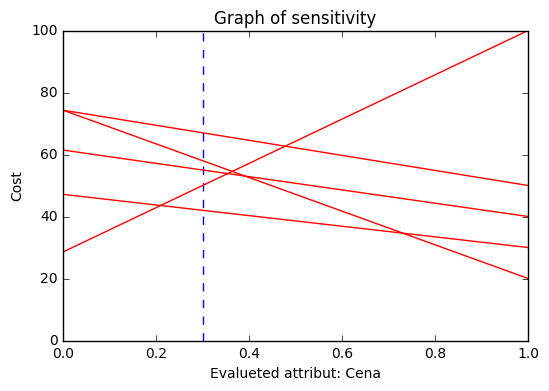

In [209]:
test.showDiagram ("Cena")